# All path

- vertex_zip : 모든 vertex 리스트
- vertex_x : 모든 vertex의 x좌표 값
- vertex_y : 모든 vertex의 y좌표 값
- vertices : 모든 vertex 리스트

In [19]:
import csv
f = open('Atlanta.csv','r')
next(f) ## 첫째줄 건너뛰기
rdr = csv.reader(f)
vertex_zip = list()    

for vertex in rdr:
    vertex_zip.append([vertex[0], vertex[1], vertex[2]])
    print(vertex)
 
f.close()

['0', '33.665568', '-84.41107']
['1', '33.76494', '-84.371819']
['2', '33.770889', '-84.358622']
['3', '34.233391', '-84.103278']
['4', '33.921088', '-84.337342']
['5', '34.087634', '-84.530646']
['6', '33.683084', '-84.442307']
['7', '33.968483', '-84.204487']
['8', '33.809946', '-84.438909']
['9', '34.070898', '-84.277636']
['10', '33.903368', '-84.376924']
['11', '33.836703', '-84.481173']
['12', '33.792891', '-84.396721']
['13', '33.975761', '-84.265625']
['14', '34.00283', '-84.146049']
['15', '34.091985', '-84.275997']
['16', '33.78851', '-84.36926']
['17', '33.87213', '-84.26165']
['18', '34.003208', '-84.040883']
['19', '33.936017', '-84.388948']


In [21]:
## 문자열 -> float
vertices = [list(map(float, x)) for x in vertex_zip]
print(vertices)

vertex_x = list() # 모든 vertex의 x좌표 값
vertex_y = list() # 모든 vertex의 y좌표 값
vertex_num = list() #모든 vertex의 index

for i in vertices:
    vertex_num.append(i[0]) #vertex의 index만 저장
    vertex_x.append(i[2]) # x좌표값만 저장 
    vertex_y.append(i[1]) # y좌표값만 저장
print(vertex_num)
print(vertex_x)
print(vertex_y)  

[[0.0, 33.665568, -84.41107], [1.0, 33.76494, -84.371819], [2.0, 33.770889, -84.358622], [3.0, 34.233391, -84.103278], [4.0, 33.921088, -84.337342], [5.0, 34.087634, -84.530646], [6.0, 33.683084, -84.442307], [7.0, 33.968483, -84.204487], [8.0, 33.809946, -84.438909], [9.0, 34.070898, -84.277636], [10.0, 33.903368, -84.376924], [11.0, 33.836703, -84.481173], [12.0, 33.792891, -84.396721], [13.0, 33.975761, -84.265625], [14.0, 34.00283, -84.146049], [15.0, 34.091985, -84.275997], [16.0, 33.78851, -84.36926], [17.0, 33.87213, -84.26165], [18.0, 34.003208, -84.040883], [19.0, 33.936017, -84.388948]]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]
[-84.41107, -84.371819, -84.358622, -84.103278, -84.337342, -84.530646, -84.442307, -84.204487, -84.438909, -84.277636, -84.376924, -84.481173, -84.396721, -84.265625, -84.146049, -84.275997, -84.36926, -84.26165, -84.040883, -84.388948]
[33.665568, 33.76494, 33.770889, 34.233391, 33.

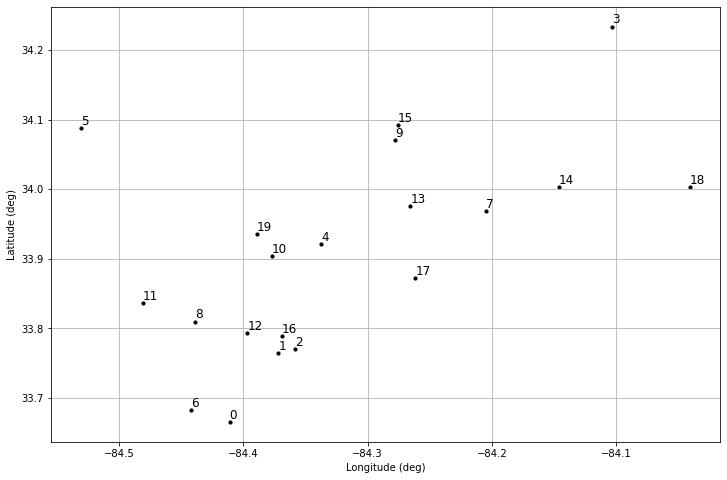

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import collections
import csv

## 주어진 vertex
##vertex = list()

##lines=collections.LineCollection(vertex,  linestyles='dotted', linewidth=1, color = 'black')

fig,axes=plt.subplots(figsize=(12,8))
plt.grid(True)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)
axes.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
##axes.add_collection(lines)
plt.scatter(vertex_x, vertex_y, marker='o', color='black', s=10)

for i in range(len(vertex_num)):
    height = vertex_y[i]
    plt.text(vertex_x[i], height + 0.005, '%d' %vertex_num[i], ha='left', va='baseline', size = 12)



axes.autoscale()
#plt.show()
#plt.savefig('South_Korea_airport_toy_example.jpg')

# Shortest_path

In [60]:
import csv
#f = open('shortest_path.csv','r') ## Weather를 고려하지 않을 경우
f = open('shortest_path_weather.csv','r') ## Weather를 고려할 경우
rdr = csv.reader(f)

# 한줄씩 읽어오기
for line in rdr:
    print(line)
 
f.close()

['2', '1', '4']


In [61]:
## shortest_path가 저장될 리스트
lines = list()
## 경로 저장 (문자열로 저장됨)
for i in range(0,len(line)):
    if(i+1 != len(line)):
        lines.append([line[i], line[i+1]])
        print(lines[i])

## 문자열 -> Int    
lines = [list(map(int, x)) for x in lines]

for i in range(0,len(line)):
    if(i+1 != len(line)):
        print(lines[i])

['2', '1']
['1', '4']
[2, 1]
[1, 4]


In [62]:
shortest_lines_zip = list()

for i in range(0, len(lines)):
    ## lines에서는 0번부터 시작하므로 1씩 빼준다.
    shortest_lines_zip.append([edges[lines[i][0]-1], edges[lines[i][1]-1]])
    
print(shortest_lines_zip)

[[[126.4928, 33.5111], [126.4498, 37.4465]], [[126.4498, 37.4465], [128.6689, 38.0611]]]


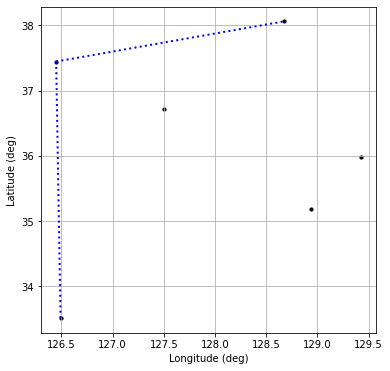

In [65]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import collections
import csv

lines_draw=collections.LineCollection(shortest_lines_zip,  linestyles='dotted', linewidth=2, color = 'blue')

fig,axes=plt.subplots(figsize=(6,6))
plt.grid(True)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')

axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)
axes.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axes.yaxis.set_major_locator(ticker.MultipleLocator(1))
axes.add_collection(lines_draw)
plt.scatter(lines_x, lines_y, marker='o', color='black', s=10)
axes.autoscale()
#plt.savefig('shortest_path.png') ## Weather를 고려하지 않을 경우
plt.savefig('shortest_path_weather.jpg') ## Weather를 고려할 경우